# Dimensionality Reduction
## Introduction
<p >First off, <em>The curse of Dimensionality is real!</em> This curse comes about from having too many features for each of your data instances. If for each instance (row) you have 1 million features (columns) this can make the training time of your algorithm increase dramatically. I have made this notebook as a resource to better understand what approaches are used for Dimensionality Reduction.
<p>The main topics can be seen in the list below: <p/>
<ul><li>
PCA (Principal Component Analysis)</li>
<li>Kernel PCA</li>
<li>LLE (Locally Linear Embedding)</li>
</ul>
Additional Information
</br>
<p> The links below provide excellent information on PCA.
<ul> 
PCA
<li> http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf</li>

<li> https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
</li>
Kernel
<li> http://sebastianraschka.com/Articles/2014_kernel_pca.html
</li>
<li> http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html
</li>
<li> https://arxiv.org/pdf/1207.3538.pdf
</li>
LLE
<li> http://sebastianraschka.com/Articles/2014_kernel_pca.html
</li>
<li> 
</li>
</ul>
</p>
<p>The parts of my script can be found in the Table of Contents below:</p>

* * *

<h3> Table of Contents </h3>
<p> The parts of the Data Science Life Cycle are still relevant to think about before you implement dimensionality reduction. You might not even need to use dimensionality reduction.<p>
<p> Dimensionality Reduction is commonly implemented during the Data Cleansing stage in section 4. Skip straight to Princpal Components Analysis to get started. <p>
<div id="TOC">
<li><a href="#Define" target="_self"><span class="toc-section-number">1</span> Define Business Problem</a>
<li><a href="#Map" target="_self"><span class="toc-section-number">2</span> Map Business Problem to Data Science Framework</a>
<li><a href="#Data" target="_self"><span class="toc-section-number">3</span> Get Data</a>

<ul>
<li><a href="#Import" target="_self"><span class="toc-section-number">3.1</span> Import Libraries</a></li>
<li><a href="#Load" target="_self"><span class="toc-section-number">3.2</span> Load and Check Data</a></li>

</ul>


<li><a href="#Exploratory" target="_self"><span class="toc-section-number">4</span> Exploratory Data Analysis/Data Cleansing</a>
<ul>
<li><a href="#Missing" target="_self"><span class="toc-section-number">4.1</span> Missing Values/ imputation</a></li>
<li><a href="#Numerical" target="_self"><span class="toc-section-number">4.2</span> Numerical Histogram</a></li>
<li><a href="#Categorical" target="_self"><span class="toc-section-number">4.3</span> Categorical Countplot</a></li>
<li><a href="#PCA" target="_self"><span class="toc-section-number">4.4</span> Principal Components Analysis ( PCA )</a></li>
<li><a href="#Kernal" target="_self"><span class="toc-section-number">4.5</span> Kernal PCA Countplot</a></li>
<li><a href="#LLE" target="_self"><span class="toc-section-number">4.6</span> Locally Linearized Embedding ( LLE ) </a></li>
</ul>



<li><a href="#Modeling" target="_self"><span class="toc-section-number">5</span> Data Modeling/Predictive Modeling</a></li>


<ul>
<li><a href="#Split" target="_self"><span class="toc-section-number">5.1</span> Split into training &amp; test sets</a></li>
<li><a href="#bldModel" target="_self"><span class="toc-section-number">5.2</span> Building the model</a></li>
<li><a href="#Variable" target="_self"><span class="toc-section-number">5.3</span> Variable importance</a></li>
<li><a href="#Prediction" target="_self"><span class="toc-section-number">5.4</span> Prediction</a></li>
</ul>


<li><a href="#Conclusion" target="_self"><span class="toc-section-number">6</span> Conclusion</a></li>

</div>

* * *

<div class="section level1" id="Define">
<h1><span class="header-section-number">1.</span> Define Business Problem</h1>
<p>Questions to consider:</p>
<ul><li>How will your solution be used by the Business? </li><li>How should the performance of your model be measured?</li><li>What is the minimum performance needed to reach business objective?</li><li>What are your current assumptions about the problem?</li></ul>
<p>Document your answers in the field below.</p>


In [65]:
#insert answer here

* * *
<div class="section level1" id="Map">
<h1><span class="header-section-number">2.</span> Map Business Problem to Data Science Framework</h1>



In [66]:
import ipywidgets as wg
from IPython.display import display
# To enable widgets insert the code found below into the command prompt to activate the extension.
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

print("Which Category found below does your business problem fall under?")
x = wg.RadioButtons(
    options=['Supervised','Semi-Supervised', 'Unsupervised', 'Reinforcement Learning', 'Online/Offline','Batch'],
    description='Choices:', 
    disabled=False
)
display(x)
print('Document why you made this choice below.')


Which Category found below does your business problem fall under?


A Jupyter Widget

Document why you made this choice below.


In [67]:
#insert answer here

* * *
<div class="section level1" id="Data">
<h1><span class="header-section-number">3.</span> Get the Data</h1>



<div class="section level2" id="Import">
<h2><span class="header-section-number">3.1</span> Import Libraries</h2>

First, we import some example libraries to use:
 1. Numpy and pandas, for data munipulation.
 2. Matplotlib for plotting.
 3. PCA (principle component analysis) from sklearn to perform dimensionality reduction
 4. train_test_split from sklearn to divid whole dataset into test and train datasets.
 5. SVM (support vector machine) from sklearn
 
Note: %matplotlib inline enables plots to show within this notebook.

In [68]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import pandas as pd 
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

<p>Now that our packages are loaded, let’s read in and take a peek at the data.</p>

<div class="section level2" id="Load">
<h2><span class="header-section-number">3.2</span> Load and check data</h2>


In [69]:
data = pd.read_csv('digits_train.csv')

In [70]:
data.head(10)#Check first 10 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data.tail(10)#Check last 10 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41990,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41992,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41994,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df=data.copy() #copy the data, to avoid making changes on original dataset

* * *
<div class="section level1" id="Exploratory">
<h1><span class="header-section-number">3.</span> Exploratory Data Analysis/Data Cleansing</h1>

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [74]:
df.dtypes # displays datatypes for all columns

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

In [75]:
df.shape # displays columns and rows

(42000, 785)

In [76]:
df.describe() # brief description of all columns

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### List columns of the dataset 

Use dataframe.columns

In [77]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

###  Variable Identification
<p> Getting to know your data. Categorize them accordingly. </p>
+ Type of Variables
 + Label (target variables) 
 + Features (predictor variables)
 + Identification - unique?
+ Data Types
 + Character
 + Numerical
+ Categorical or continous
 + Categorical
 + Continous

### Label vs. Features (target vs. predictors)
<p> For this data set we see the following: </p>
+ Lable y (target): 'label'
+ Unique identifier: '[insert here]'
+ Features X (predictors): rest of variables

### Description of the data

The dataset contains ...

The goal or the objective of the project is to predict...

A brief description of the data columns:
+ 'column_name': the ...
+ 'Column_name': the ...

<div class="section level2" id="Missing">
<h2><span class="header-section-number">4.1</span> Missing Values/Imputation</h2>
### Checking number of missing values for each column

Use dataframe.isnull().sum()

In [78]:
df.isnull().sum()#returns total sum of missing values for each column of the dataframe.

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [79]:
df=df.fillna(0)# Fill with zero for descriptive statistics

### Examine the different Data types

In [80]:
cols = [c for c in df.columns[0:16] if c not in ['label']]
n_col=[cols]# numerical columns
c_col=['label'] #categorical columns


In [81]:
n_col

[['pixel0',
  'pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14']]

<div class="section level2" id="Numerical">
<h2><span class="header-section-number">4.2</span> Numerical Histogram</h2>
<p> Take a quick peek at 2 of the pixel columns distributions.

C:\Users\Jared\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Jared\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


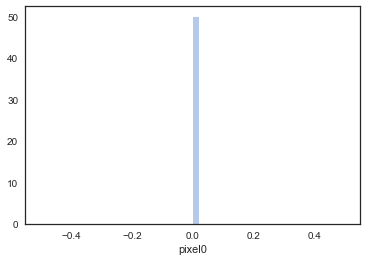

In [82]:
sns.distplot(df['pixel0']) 

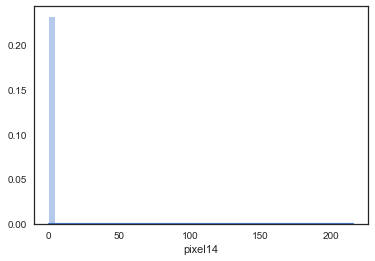

In [83]:
sns.distplot(df['pixel14']) 

<div class="section level2" id="Categorical">
<h2><span class="header-section-number">4.3</span> Categorical Countplot</h2>
### Frequencies of categorical columns using countplot

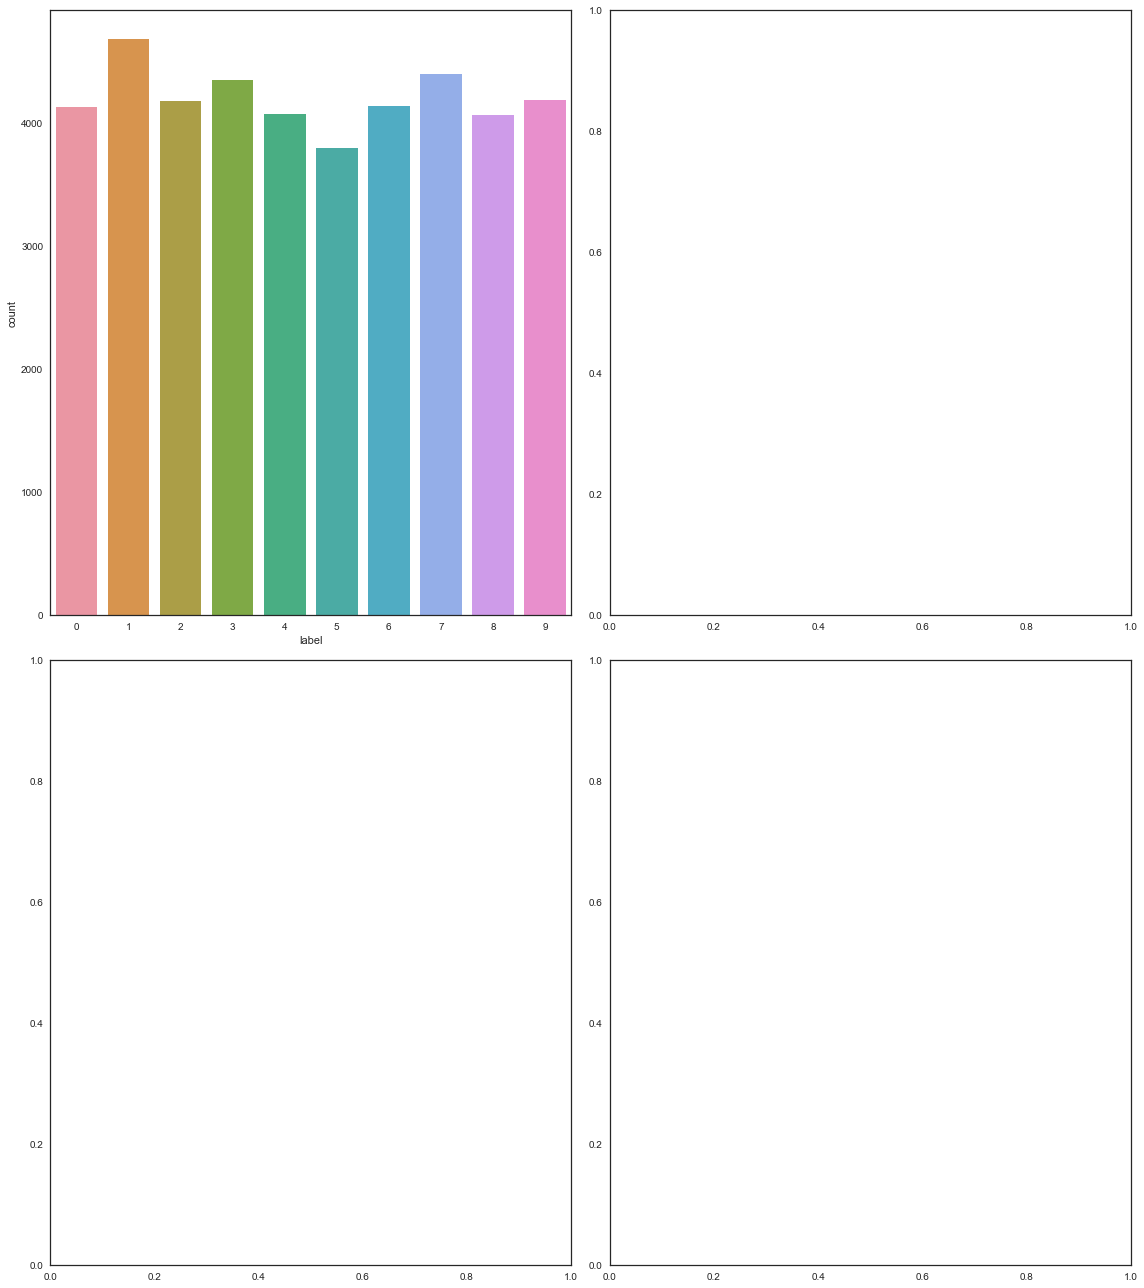

In [84]:
fig, axs = plt.subplots(2, 2, figsize = (16,18))
axslist=[ax for y in axs for ax in y]
for i in range(len(c_col)):
    sns.countplot(df[c_col[i]],ax=axslist[i])
fig.tight_layout() 

<div class="section level2" id="PCA">
<h2><span class="header-section-number">4.4</span> Principal Components Analysis</h2>
<p>When working with numerical datasets it is common practice to use Principal Component Analysis prior to running your machine learning algorithm in order to reduce the number of attributes (columns) associated with your dataset.</p> 

+ <em>Think of it as an additional tool you can use for preprocessing and data cleansing to find what is most important in your data.</em> 

<p>Using this method allows you to pick those attributes with the highest combined variance for your dataset, and consequently get rid of the attributes that are not as important. The goal is to preserve the most amount of variance within your dataset while minimizing information loss.</p>

<em>** The scale of the attributes affects the outcome of PCA. It is common to standardized all attributes to zero mean and unit variance first.**</em>

### What is a Principal Component?
<p> </p>



In [85]:
#import class PCA 
from sklearn.decomposition import PCA


Before we dive into its implementation using the Sklearn library, I highly recommend reviewing the documention on PCA using the help() function. 

In [86]:
help(PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of components to keep.
 |      if n_components is not set all components are kept::
 |  
 |          n_components == min(n_samples, n

In [87]:
pca=PCA() # set class constructor equal to new variable pca
pca.fit(df) # use fit method on our data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<p>You can access the principal compenents with the ( components_ ) variable</p>

In [88]:
pca.components_

array([[ -8.02331972e-04,  -0.00000000e+00,  -0.00000000e+00, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  2.86080795e-03,   1.11022302e-16,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -4.99446269e-04,   1.38777878e-17,   1.38777878e-17, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   2.10436988e-01,  -2.40804936e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.56795649e-01,  -6.07403386e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -0.00000000e+00,  -5.45015526e-02,   9.09775853e-02, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00]])

### Explained Variance Ratio
<p> Accessing the ( explained\_variance\_ratio_ ) variable indicates the proportion of variance as a percentage that is associated with each principal components axis. </p>

In [89]:
eigenvalues=pca.explained_variance_ratio_

In [90]:
print(eigenvalues)

[  9.74892029e-02   7.16030749e-02   6.14588996e-02   5.37929512e-02
   4.89427671e-02   4.30320476e-02   3.27704281e-02   2.89209709e-02
   2.76689566e-02   2.34886696e-02   2.09932044e-02   2.05899867e-02
   1.70255574e-02   1.69278312e-02   1.58112488e-02   1.48323620e-02
   1.31968887e-02   1.28272407e-02   1.18797353e-02   1.15275437e-02
   1.07218888e-02   1.01519689e-02   9.64903231e-03   9.12843864e-03
   8.87638708e-03   8.38765035e-03   8.11855832e-03   7.77404541e-03
   7.40633767e-03   6.86659898e-03   6.57980660e-03   6.38798274e-03
   5.99365562e-03   5.88912795e-03   5.64333810e-03   5.40965871e-03
   5.09220927e-03   4.87503804e-03   4.75568268e-03   4.66543591e-03
   4.52951936e-03   4.44988467e-03   4.18254704e-03   3.97505400e-03
   3.84541301e-03   3.74918568e-03   3.61013271e-03   3.48521422e-03
   3.36487266e-03   3.20737438e-03   3.15466623e-03   3.09144792e-03
   2.93708481e-03   2.86540726e-03   2.80759156e-03   2.69617986e-03
   2.65830764e-03   2.56298088e-03

Lets plot our eigenvalues for each axis (Principal Component).

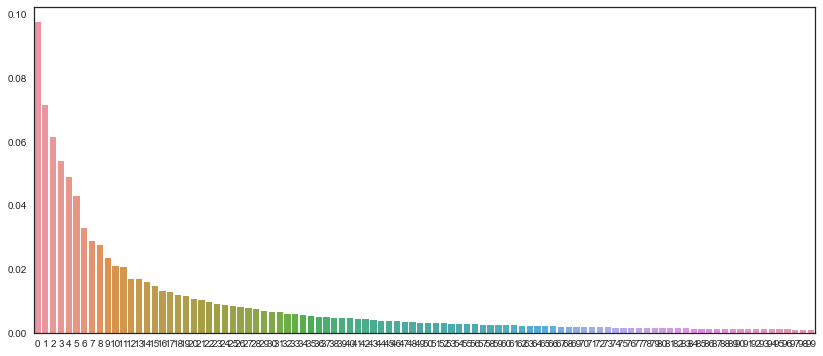

In [91]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.barplot(x=list(range(100)),y=eigenvalues[:100]/eigenvalues.sum())

Next we will plot the cumulative variance (cum_var)  of the function below to shows us how much cumulative variance is explained by adding each additional principal component.

In [92]:
# This function calculates the cumulative variation and appends it to the cum_var list.
var=0
cum_var=[]
for e in eigenvalues:
    var+=e
    cum_var.append(var/eigenvalues.sum())

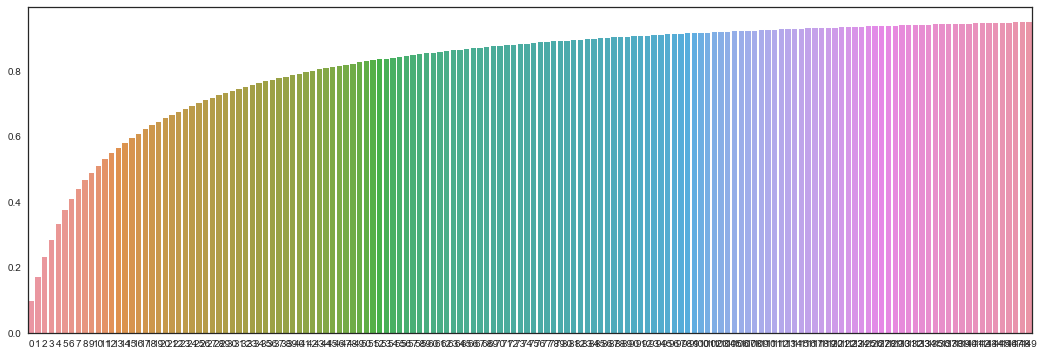

In [93]:
plt.figure(figsize=(18,6))
sns.barplot(x=list(range(150)),y=cum_var[:150])

In [94]:
cum_var[150]

0.9490629265135001

In [95]:
cum_var[784]

0.99999999999999922

Looking at the cumulative variation of 150 of the principal compenents we can see that those 150 contain roughly 95% of the variance of the dataset. This will allow the training to to be reduced greatly because we have will not have to use 634 additional attributes for training.

<div class="section level2" id="Kernal">
<h2><span class="header-section-number">4.5</span> Kernal Principal Components Analysis</h2>

If your data is not linearaly separable as in the example shown below PCA will not work. In order to get around this problem you need to use KPCA. The following examples have been taken from Sebastian Raschka's excellent article, and uses the sklearn implementaiton of KPCA.
http://sebastianraschka.com/Articles/2014_kernel_pca.html

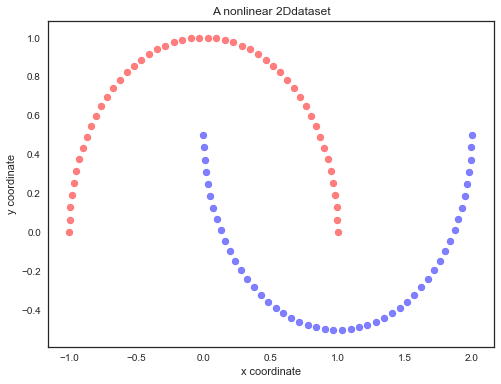

In [96]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

In [97]:
from sklearn.decomposition import KernelPCA
help(KernelPCA)

Help on class KernelPCA in module sklearn.decomposition.kernel_pca:

class KernelPCA(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Kernel Principal component analysis (KPCA)
 |  
 |  Non-linear dimensionality reduction through the use of kernels (see
 |  :ref:`metrics`).
 |  
 |  Read more in the :ref:`User Guide <kernel_PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=None
 |      Number of components. If None, all non-zero components are kept.
 |  
 |  kernel : "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
 |      Kernel. Default="linear".
 |  
 |  gamma : float, default=1/n_features
 |      Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other
 |      kernels.
 |  
 |  degree : int, default=3
 |      Degree for poly kernels. Ignored by other kernels.
 |  
 |  coef0 : float, default=1
 |      Independent term in poly and sigmoid kernels.
 |      Ignored by other kernels.
 |  
 |  kernel_params : mapping of 

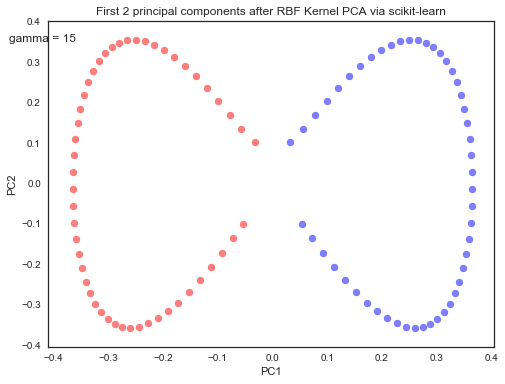

In [98]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.48, 0.35, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We can see how KPCA has transformed this data set so it is now linearly separable.

<div class="section level2" id="LLE">
<h2><span class="header-section-number">4.6</span> Locally Linearized Embedding (LLE)</h2>

An unsupervised learning algorithm which is a non-linear dimensionality reduction (NLDR) technique. The following code examples were taken from the article linked below. Which provides an excellent over view of each technique.

http://sebastianraschka.com/Articles/2014_kernel_pca.html

In [99]:
from sklearn.manifold import locally_linear_embedding
help(locally_linear_embedding)

Help on function locally_linear_embedding in module sklearn.manifold.locally_linear:

locally_linear_embedding(X, n_neighbors, n_components, reg=0.001, eigen_solver='auto', tol=1e-06, max_iter=100, method='standard', hessian_tol=0.0001, modified_tol=1e-12, random_state=None, n_jobs=1)
    Perform a Locally Linear Embedding analysis on the data.
    
    Read more in the :ref:`User Guide <locally_linear_embedding>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix, BallTree, KDTree, NearestNeighbors}
        Sample data, shape = (n_samples, n_features), in the form of a
        numpy array, sparse array, precomputed tree, or NearestNeighbors
        object.
    
    n_neighbors : integer
        number of neighbors to consider for each point.
    
    n_components : integer
        number of coordinates for the manifold.
    
    reg : float
        regularization constant, multiplies the trace of the local covariance
        matrix of the distances.
    
    eigen_

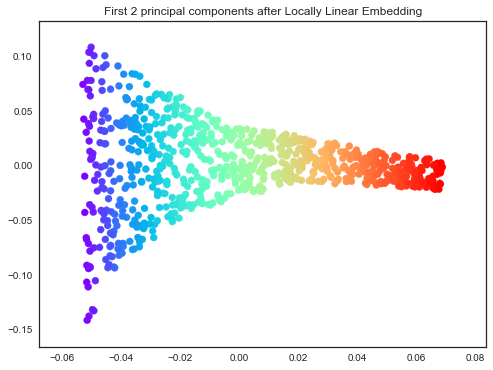

In [100]:
from sklearn.datasets.samples_generator import make_swiss_roll
X, color = make_swiss_roll(n_samples=800, random_state=123)
X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)

plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

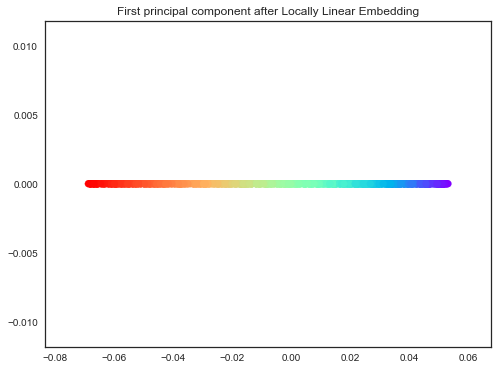

In [101]:
from sklearn.manifold import locally_linear_embedding

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=1)

plt.figure(figsize=(8,6))
plt.scatter(X_lle, np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)

plt.title('First principal component after Locally Linear Embedding')
plt.show()

* * *
<div class="section level1" id="Modeling">
<h1><span class="header-section-number">5.</span> Data Modeling/Predictive Modeling</h1>


<div class="section level2" id="Split">
<h2><span class="header-section-number">5.1</span> Split Data into Training & Test sets</h2>

In [102]:
cols = [c for c in df.columns if c not in ['label']] #get feature column names excluding Target and others 
X=df[cols]
y=df.iloc[:,:1]

In [103]:
#Split the data into train_X, test_X, train_y and test_y
train_X, test_X,train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=0)

C:\Users\Jared\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [104]:
print('Shape of train_X: {0:} rows and {1:} columns'.format(*train_X.shape))
print('Shape of train_y: {0:} rows and {1:} columns'.format(*train_y.shape))
print('Shape of test_X: {0:} rows and {1:} columns'.format(*test_X.shape))
print('Shape of test_y: {0:} rows and {1:} columns'.format(*test_y.shape))

Shape of train_X: 33600 rows and 784 columns
Shape of train_y: 33600 rows and 1 columns
Shape of test_X: 8400 rows and 784 columns
Shape of test_y: 8400 rows and 1 columns


<div class="section level2" id="bldModel">
<h2><span class="header-section-number">5.2</span> Building the Model</h2>
<p> We convert the data into numpy arrays which will be used by PCA and SVM later.

.fit() is to estimate parameters of a model, and .transform() is to transform the original data into new features based on .fit()</p>

In [105]:
train_y = np.array(train_y)# convert to numpy arrays
train_y = train_y.ravel()
train_X = np.array(train_X)# convert to numpy arrarys.
test_y = np.array(test_y)# convert to numpy arrays
test_y = test_y.ravel()
test_X = np.array(test_X)

Implementing PCA.

In [106]:
print('Dimensionality Reduction...\n')

print('Original train data shape is {0:} rows and {1:} columns'.format(*train_X.shape))
pca = PCA(n_components=0.95, whiten=True)#See documentation of whiten in help(PCA) cell above
pca.fit(train_X)
train_X = pca.transform(train_X)
# you can fit and transform in one line using pca.fit_transform.
print('Transformed train data shape is {0:} rows and {1:} columns'.format(*train_X.shape))


Dimensionality Reduction...

Original train data shape is 33600 rows and 784 columns
Transformed train data shape is 33600 rows and 153 columns


Let's now fit the SVM model using default settings.

In [107]:
print('Train SVM with PCA...')
clf = SVC()
clf.fit(train_X, train_y)

Train SVM with PCA...


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

<div class="section level2" id="Variable">
<h2><span class="header-section-number">5.3</span> Variable Importance</h2>

<p> The value of importance that each of your Support Vectors have which are used in classification is stored in the dual\_coef\_ attribute of your classifier. These importances are learned during training.

In [109]:
#Coefficients of the support vector in the decision function.
#For multiclass, coefficient for all 1-vs-1 classifiers.
#The layout of the coefficients in the multiclass case is somewhat
#non-trivial. See the section about multi-class classification in the
#SVM section of the User Guide for details.

clf.dual_coef_

array([[ 0.05035849,  0.        ,  0.        , ..., -0.16804957,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.08194786, ..., -0.28978455,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.00931834, ..., -0.91602758,
        -0.        , -0.23537357],
       ..., 
       [ 0.        ,  0.        ,  0.        , ..., -0.44916998,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.37735057, -0.        ],
       [ 0.        ,  0.05981136,  0.        , ..., -0.74309548,
        -0.        , -0.32723394]])

<p> In the following code we look at the number of support vectors for each class. In a worse case scenario we would have a support vector for every training instance of the data in our case 34000. We can see since this is a multiclass problem that some of our classes require more support vectors than others to separate themselves from the other classes </p>

In [110]:
#Number of support vectors for each class.   
print(list(range(0,10)))
clf.n_support_

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


array([1502,  558, 1963, 2046, 1737, 1981, 1458, 1389, 2129, 1807])

<div class="section level2" id="Prediction">
<h2><span class="header-section-number">5.4</span> Prediction</h2>

In [111]:
with_PCA_train=clf.score(train_X, train_y)

In [112]:
print('Original test data shape is {0:} rows and {1:} columns'.format(*test_X.shape))
test_X = pca.transform(test_X)
# you can fit and transform in one line using pca.fit_transform.
print('Transformed test data shape is {0:} rows and {1:} columns'.format(*test_X.shape))
predict = clf.predict(test_X)

Original test data shape is 8400 rows and 784 columns
Transformed test data shape is 8400 rows and 153 columns


In [113]:
predict

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [114]:
with_PCA_test=clf.score(test_X,test_y)

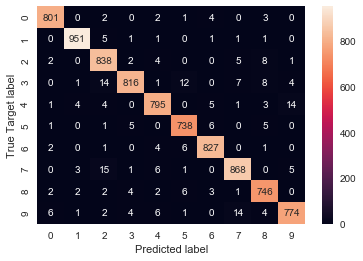

In [115]:
from sklearn.metrics import auc,precision_score, recall_score, f1_score,accuracy_score 
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve
confusion = confusion_matrix(test_y,clf.predict(test_X))
sns.heatmap(confusion,annot=True, fmt="d")
plt.ylabel('True Target label')
plt.xlabel('Predicted label')

* * *
<div class="section level1" id="Conclusion">
<h1><span class="header-section-number">6.</span> Conclusion/Presentation of Solution</h1>


Understanding whether your data set follows a linear or non-linear patterns is an important part of choosing your dimensionality reduction technique. Including the techniques mentionned in this notebook I have included some other options to learn about as well.

If your datasets patterns are linear here are some great options:
<ul><li>
PCA (Principal Component Analysis)</li>
<li>Independent Component Analysis (ICA)</li>
<li>Singular Value Decomposition</li>
<li>Factor Analysis</li>
</ul>

If its non-linear heres a link to a wikipedia page with many more algorithms.

https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Related_Linear_Decomposition_Methods